# Choropleth Maps

## Offline Plotly Usage

In [1]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
init_notebook_mode(connected=True) 

## Choropleth US Maps

In [4]:
import pandas as pd

In [5]:
data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY'],
            locationmode = 'USA-states',
            colorscale= 'Jet',
            text= ['text1','text2','text3'],
            z=[1.0,2.0,3.0],
            colorbar = {'title':'Colorbar Title'})

In [6]:
layout = dict(geo = {'scope':'usa'})

In [7]:
choromap = go.Figure(data = [data],layout = layout)

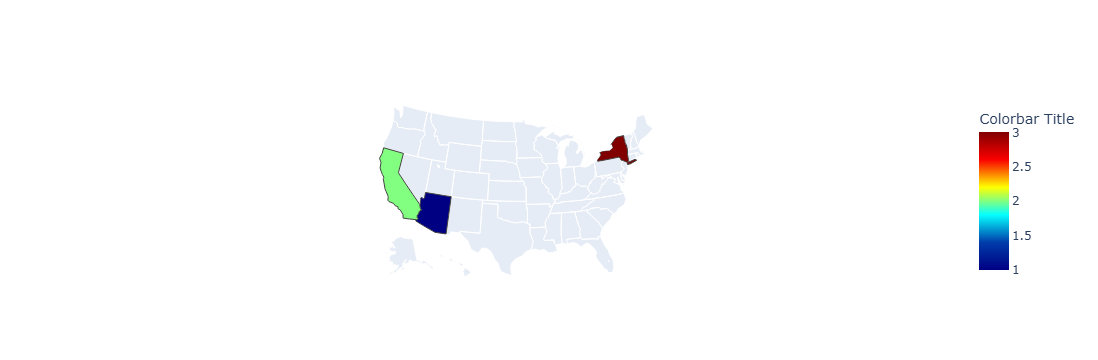

In [8]:
iplot(choromap)

### Real Data US Map Choropleth

In [9]:
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


Now out data dictionary with some extra marker and colorbar arguments:

In [10]:
data = dict(type='choropleth',
            colorscale = 'ylorbr',
            locations = df['code'],
            z = df['total exports'],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

In [11]:
layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [12]:
choromap = go.Figure(data = [data],layout = layout)

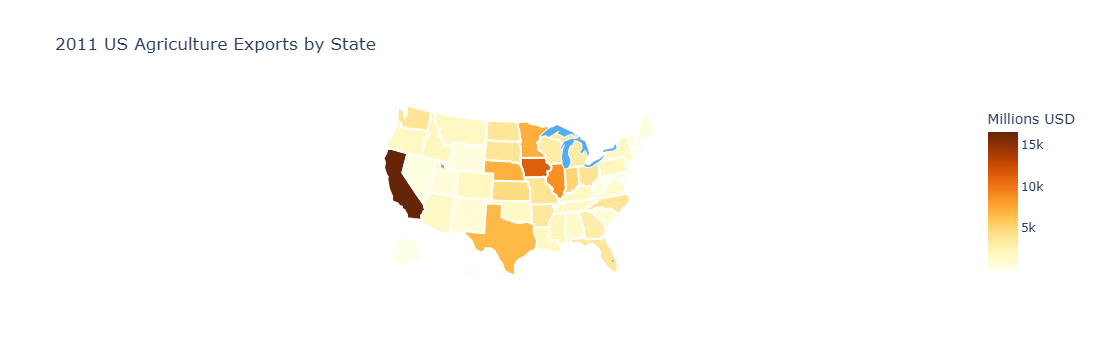

In [13]:
iplot(choromap)

# World Choropleth Map

In [14]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [15]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [16]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

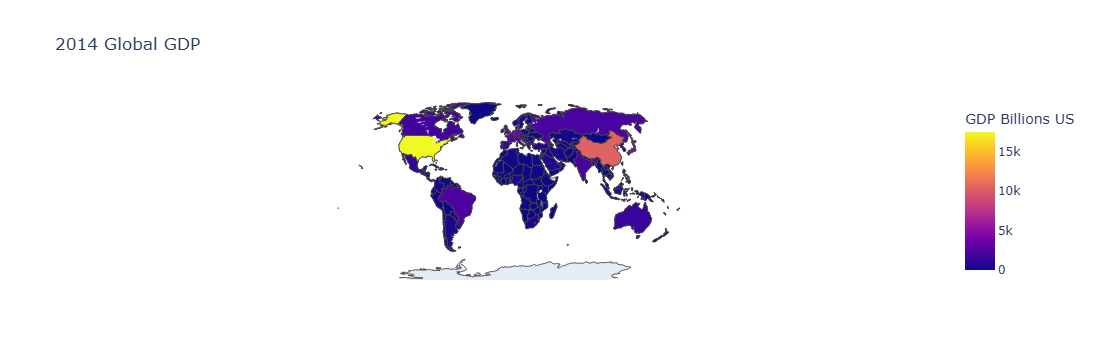

In [17]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)